<a href="https://colab.research.google.com/github/badrishdavey/datascience_lab/blob/master/Session_5_Pandas_and_Data_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Discussion on Matrix Multiplication + Inverse as a Machine Learning Tool

In [0]:
import numpy as np

In [0]:
X = np.random.randn(4, 4)
X_future = np.random.randn(5, 4)

In [0]:
X

array([[-1.06269986,  1.37422568,  0.41405344, -0.93483023],
       [ 0.7248188 , -0.31738747, -0.36683465,  0.08183293],
       [ 0.737846  , -1.46285115, -1.2766565 ,  0.67143663],
       [-0.56346367, -2.63013855, -0.94778691, -0.23165922]])

In [0]:
X_future

array([[-0.68255878,  1.31883147,  0.49515942,  0.84126934],
       [-0.00932204,  0.49711496,  0.80254152,  0.34913109],
       [-0.8278893 ,  1.26351958,  0.90391071, -0.03281504],
       [ 0.73627515,  0.39812364,  0.35379555,  0.52816823],
       [ 1.04096978, -0.08103588,  0.84393871, -0.55379252]])

In [0]:
def get_y(x):
  return(0.3*x[0] + 0.8*x[1] - 5*x[2] + 5*x[3])

Y = np.array([get_y(x) for x in X])
Y_future = np.array([get_y(x) for x in X_future])

In [0]:
Y

array([-5.96384775,  2.20687356,  8.79153855,  1.30748854])

In [0]:
Y_future

array([ 2.58084716, -1.87215677, -3.92117985,  1.41124485, -6.7411939 ])

$$ Y =X \bullet \beta $$

$$ Y_{future} = X_{future} \bullet \beta $$

$ X^{-1} \bullet Y = X^{-1} \bullet X  \bullet \beta $

$ X^{-1} \bullet Y = I  \bullet \beta $

$ X^{-1} \bullet Y = \beta $

$$ Y_{future} = X_{future} \bullet X^{-1} \bullet Y $$


In [0]:
beta = np.linalg.inv(X)
X_future.dot(beta)

array([-13.66249152, -10.47835204, -14.75084301, -11.63819153,
       -11.30759175])

# Data Wrangling

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Exerpts from 10 minutes to Pandas

In [0]:
s = pd.Series([1,3,5,np.nan,6,8])  # NaN is Not-a-Number -> Missing value or corrupt value
## If you have np.nan or np.inf -> datatype will be np.float

In [0]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [0]:
dates = pd.date_range('20130101', '20130218', freq='3D')
dates

DatetimeIndex(['2013-01-01', '2013-01-04', '2013-01-07', '2013-01-10',
               '2013-01-13', '2013-01-16', '2013-01-19', '2013-01-22',
               '2013-01-25', '2013-01-28', '2013-01-31', '2013-02-03',
               '2013-02-06', '2013-02-09', '2013-02-12', '2013-02-15',
               '2013-02-18'],
              dtype='datetime64[ns]', freq='3D')

In [0]:
pd.Series([1, 5, 3, 7],index=list(range(4)),dtype='float32')

0    1.0
1    5.0
2    3.0
3    7.0
dtype: float32

In [0]:
pd.Series([1, 5, 3, 7],index=[3, 1, 0, 2],dtype='float32')

3    1.0
1    5.0
0    3.0
2    7.0
dtype: float32

In [0]:
[3, 5] * 4

[3, 5, 3, 5, 3, 5, 3, 5]

In [0]:
df2 = pd.DataFrame({
    'A' : 1.,
    'B' : pd.Timestamp('20130102'),
    'C' : pd.Series([1, 5, 3, 7],index=list(range(4)),dtype='float32'),
#     'D' : np.array([3] * 4,dtype='int32'),
#     'E' : pd.Categorical(["test","train","test","train"]),
    'F' : 'foo',
    'G' : pd.Series([1, 5, 3, 7],index=['A', 'B', 'C', 'D'],dtype='float32'),
#     'H' : [5, 7, 2, 5]
})
df2

,A,B,C,F,G
0,1.0,2013-01-02,1.0,foo,NaN
1,1.0,2013-01-02,5.0,foo,NaN
2,1.0,2013-01-02,3.0,foo,NaN
3,1.0,2013-01-02,7.0,foo,NaN
A,1.0,2013-01-02,NaN,foo,1.0
B,1.0,2013-01-02,NaN,foo,5.0
C,1.0,2013-01-02,NaN,foo,3.0
D,1.0,2013-01-02,NaN,foo,7.0


In [0]:
df2 = pd.DataFrame({
    'A' : 1.,
    'B' : pd.Timestamp('20130102'),
    'C' : pd.Series([1, 5, 3, 7],index=list(range(4)),dtype='float32'),
    'D' : np.array([3] * 4,dtype='int32'),
    'E' : pd.Categorical(["test","train","test","train"]),
    'F' : 'foo',
    'G' : pd.Series([1, 5, 3, 7],index=[3, 0, 2, 1],dtype='float32'),
    'H' : [5, 7, 2, 5]
})
df2

,A,B,C,D,E,F,G,H
0,1.0,2013-01-02,1.0,3,test,foo,5.0,5
1,1.0,2013-01-02,5.0,3,train,foo,7.0,7
2,1.0,2013-01-02,3.0,3,test,foo,3.0,2
3,1.0,2013-01-02,7.0,3,train,foo,1.0,5


In [0]:
df2.describe()

,A,C,D,G,H
count,4.0,4.000000,4.0,4.000000,4.000000
mean,1.0,4.000000,3.0,4.000000,4.750000
std,0.0,2.581989,0.0,2.581989,2.061553
min,1.0,1.000000,3.0,1.000000,2.000000
25%,1.0,2.500000,3.0,2.500000,4.250000
50%,1.0,4.000000,3.0,4.000000,5.000000
75%,1.0,5.500000,3.0,5.500000,5.500000
max,1.0,7.000000,3.0,7.000000,7.000000


In [0]:
lst = []
for i, col in enumerate(df2.columns):
  if col not in df2.describe().columns:
    x = col
    if i % 2 != 0:
      x = col * 2
    lst.append(x)
lst

['BB', 'E', 'FF']

In [0]:
[col if j % 2 == 0 else col * 2
 for j, col in enumerate(df2.columns)
 if col not in df2.describe().columns]

['BB', 'E', 'FF']

In [0]:
list(map(lambda x: x[1] if x[0] % 2 == 0 else x[1] * 2,
         filter(lambda x: x[1] not in df2.describe().columns,
                enumerate(df2.columns))))

['BB', 'E', 'FF']

In [0]:
df2.columns
[col for col in df2.columns]
df2.describe().columns
[col
 for col in df2.columns
 if col not in df2.describe().columns]
df2[[col for col in df2.columns if col not in df2.describe().columns]]
df2[[col for col in df2.columns if col not in df2.describe().columns]].describe()

,B,E,F
count,4,4,4
unique,1,2,1
top,2013-01-02 00:00:00,train,foo
freq,4,2,4
first,2013-01-02 00:00:00,NaN,NaN
last,2013-01-02 00:00:00,NaN,NaN


In [0]:
df2[[col for col in df2.columns if col not in df2.describe().columns]].describe()

,B,E,F
count,4,4,4
unique,1,2,1
top,2013-01-02 00:00:00,train,foo
freq,4,2,4
first,2013-01-02 00:00:00,NaN,NaN
last,2013-01-02 00:00:00,NaN,NaN


In [0]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
G           float32
H             int64
dtype: object

In [0]:
df2.head()

,A,B,C,D,E,F,G,H
0,1.0,2013-01-02,1.0,3,test,foo,5.0,5
1,1.0,2013-01-02,5.0,3,train,foo,7.0,7
2,1.0,2013-01-02,3.0,3,test,foo,3.0,2
3,1.0,2013-01-02,7.0,3,train,foo,1.0,5


In [0]:
df2.head(2)

,A,B,C,D,E,F,G,H
0,1.0,2013-01-02,1.0,3,test,foo,5.0,5
1,1.0,2013-01-02,5.0,3,train,foo,7.0,7


In [0]:
df2.tail(3)

,A,B,C,D,E,F,G,H
1,1.0,2013-01-02,5.0,3,train,foo,7.0,7
2,1.0,2013-01-02,3.0,3,test,foo,3.0,2
3,1.0,2013-01-02,7.0,3,train,foo,1.0,5


In [0]:
df2.index

Int64Index([0, 1, 2, 3], dtype='int64')

In [0]:
df2.index = ['A', 'B', 'C', 'D']
idx = df2.index
idx = idx[1:3]
print(idx)
# df2
df2.loc[idx]  # Value of index of the row (it has to be something from the index)
# df2.iloc[2:3]  # Position of the row (it has to be a number or a set of numbers)

Index(['B', 'C'], dtype='object')


,A,B,C,D,E,F,G,H
B,1.0,2013-01-02,5.0,3,train,foo,7.0,7
C,1.0,2013-01-02,3.0,3,test,foo,3.0,2


In [0]:
df3 = df2.copy()
df3.columns = ['A', 'B', 'C', 'D', 'E', 'F', 'Index Column', 'H']
df3.set_index('Index Column').loc[[3.0, 7.0]].reset_index().set_index('C')

,Index Column,A,B,D,E,F,H
C,,,,,,,
3.0,3.0,1.0,2013-01-02,3,test,foo,2
5.0,7.0,1.0,2013-01-02,3,train,foo,7


In [0]:
df3 = df2.set_index('G')
df3

,A,B,C,D,E,F,H
G,,,,,,,
5.0,1.0,2013-01-02,1.0,3,test,foo,5
7.0,1.0,2013-01-02,5.0,3,train,foo,7
3.0,1.0,2013-01-02,3.0,3,test,foo,2
1.0,1.0,2013-01-02,7.0,3,train,foo,5


In [0]:
df3.iloc[[2, 1, 3], [1, 5, 3]]

,B,F,D
G,,,
3.0,2013-01-02,foo,3
7.0,2013-01-02,foo,3
1.0,2013-01-02,foo,3


In [0]:
df3.loc[[7.0, 3.0], ['A', 'D', 'B']]

,A,D,B
G,,,
7.0,1.0,3,2013-01-02
3.0,1.0,3,2013-01-02


In [0]:
idx = df3.index.values
idx[2] = 1.5
print(idx)
df3['I'] = idx
df3
df3.reset_index().set_index('I')

[5.  7.  1.5 1. ]


,G,A,B,C,D,E,F,H
I,,,,,,,,
5.0,5.0,1.0,2013-01-02,1.0,3,test,foo,5
7.0,7.0,1.0,2013-01-02,5.0,3,train,foo,7
1.5,1.5,1.0,2013-01-02,3.0,3,test,foo,2
1.0,1.0,1.0,2013-01-02,7.0,3,train,foo,5


In [0]:
df3['B']

G
5.0   2013-01-02
7.0   2013-01-02
1.5   2013-01-02
1.0   2013-01-02
Name: B, dtype: datetime64[ns]

In [0]:
df3.B

G
5.0   2013-01-02
7.0   2013-01-02
1.5   2013-01-02
1.0   2013-01-02
Name: B, dtype: datetime64[ns]

In [0]:
df3[['B', 'C']]

,B,C
G,,
5.0,2013-01-02,1.0
7.0,2013-01-02,5.0
1.5,2013-01-02,3.0
1.0,2013-01-02,7.0


In [0]:
df3.B

G
5.0   2013-01-02
7.0   2013-01-02
1.5   2013-01-02
1.0   2013-01-02
Name: B, dtype: datetime64[ns]

In [0]:
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=['A', 'B', 'C', 'D'])  # list('ABCD')
df
dates[0:4]
df1 = df.reindex(index=list(dates[0:4]), columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,E
2013-01-01,-0.031169,-0.198565,-1.055631,0.698925,1.0
2013-01-02,0.550093,0.307550,2.220599,0.602522,1.0
2013-01-03,-0.723918,0.224304,-2.347042,-1.227748,NaN
2013-01-04,-0.095808,-0.788400,-2.029033,1.910493,NaN


In [0]:
df1.dropna()

,A,B,C,D,E
2013-01-01,-0.031169,-0.198565,-1.055631,0.698925,1.0
2013-01-02,0.550093,0.307550,2.220599,0.602522,1.0


In [0]:
df1.dropna(how='all')

,A,B,C,D,E
2013-01-01,-0.031169,-0.198565,-1.055631,0.698925,1.0
2013-01-02,0.550093,0.307550,2.220599,0.602522,1.0
2013-01-03,-0.723918,0.224304,-2.347042,-1.227748,NaN
2013-01-04,-0.095808,-0.788400,-2.029033,1.910493,NaN


In [0]:
df1.dropna(axis=1)

,A,B,C,D
2013-01-01,-0.031169,-0.198565,-1.055631,0.698925
2013-01-02,0.550093,0.307550,2.220599,0.602522
2013-01-03,-0.723918,0.224304,-2.347042,-1.227748
2013-01-04,-0.095808,-0.788400,-2.029033,1.910493


In [0]:
df1.dropna(how='all', axis=1)

,A,B,C,D,E
2013-01-01,-0.031169,-0.198565,-1.055631,0.698925,1.0
2013-01-02,0.550093,0.307550,2.220599,0.602522,1.0
2013-01-03,-0.723918,0.224304,-2.347042,-1.227748,NaN
2013-01-04,-0.095808,-0.788400,-2.029033,1.910493,NaN


In [0]:
df1.fillna(3)

,A,B,C,D,E
2013-01-01,-0.031169,-0.198565,-1.055631,0.698925,1.0
2013-01-02,0.550093,0.307550,2.220599,0.602522,1.0
2013-01-03,-0.723918,0.224304,-2.347042,-1.227748,3.0
2013-01-04,-0.095808,-0.788400,-2.029033,1.910493,3.0


In [0]:
df1.fillna({'A': 3, 'E': 5})

,A,B,C,D,E
2013-01-01,-0.031169,-0.198565,-1.055631,0.698925,1.0
2013-01-02,0.550093,0.307550,2.220599,0.602522,1.0
2013-01-03,-0.723918,0.224304,-2.347042,-1.227748,5.0
2013-01-04,-0.095808,-0.788400,-2.029033,1.910493,5.0


In [0]:
df1.fillna(df1.mean(axis=0))

,A,B,C,D,E
2013-01-01,-0.031169,-0.198565,-1.055631,0.698925,1.0
2013-01-02,0.550093,0.307550,2.220599,0.602522,1.0
2013-01-03,-0.723918,0.224304,-2.347042,-1.227748,1.0
2013-01-04,-0.095808,-0.788400,-2.029033,1.910493,1.0


In [0]:
df1.mean()

A   -0.075201
B   -0.113778
C   -0.802776
D    0.496048
E    1.000000
dtype: float64

In [0]:
df1.sum()

A   -0.300802
B   -0.455111
C   -3.211106
D    1.984192
E    2.000000
dtype: float64

In [0]:
df1.sum(1)

2013-01-01    0.413560
2013-01-02    4.680764
2013-01-03   -4.074404
2013-01-04   -1.002748
dtype: float64

In [0]:
df1.mean(1)

2013-01-01    0.082712
2013-01-02    0.936153
2013-01-03   -1.018601
2013-01-04   -0.250687
dtype: float64

In [0]:
df1

,A,B,C,D,E
2013-01-01,-0.031169,-0.198565,-1.055631,0.698925,1.0
2013-01-02,0.550093,0.307550,2.220599,0.602522,1.0
2013-01-03,-0.723918,0.224304,-2.347042,-1.227748,NaN
2013-01-04,-0.095808,-0.788400,-2.029033,1.910493,NaN


In [0]:
df1.shift(1)

,A,B,C,D,E
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,-0.031169,-0.198565,-1.055631,0.698925,1.0
2013-01-03,0.550093,0.307550,2.220599,0.602522,1.0
2013-01-04,-0.723918,0.224304,-2.347042,-1.227748,NaN


In [0]:
df1.join(df1.shift(1), rsuffix='_Yesterday', lsuffix='').join(df1.shift(2), rsuffix='_2DaysAgo', lsuffix='')

,A,B,C,D,E,A_Yesterday,B_Yesterday,C_Yesterday,D_Yesterday,E_Yesterday,A_2DaysAgo,B_2DaysAgo,C_2DaysAgo,D_2DaysAgo,E_2DaysAgo
2013-01-01,-0.031169,-0.198565,-1.055631,0.698925,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02,0.550093,0.307550,2.220599,0.602522,1.0,-0.031169,-0.198565,-1.055631,0.698925,1.0,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.723918,0.224304,-2.347042,-1.227748,NaN,0.550093,0.307550,2.220599,0.602522,1.0,-0.031169,-0.198565,-1.055631,0.698925,1.0
2013-01-04,-0.095808,-0.788400,-2.029033,1.910493,NaN,-0.723918,0.224304,-2.347042,-1.227748,NaN,0.550093,0.307550,2.220599,0.602522,1.0


In [0]:
def get_sum_2_3(df):
  return(df.iloc[[1, 2]].sum())
df.apply(get_sum_2_3)

A   -0.173825
B    0.531854
C   -0.126442
D   -0.625226
dtype: float64

In [0]:
def get_sum_2_3(df):
  df.mean()
  return(df.iloc[[2, 3]].sum())

df.apply(get_sum_2_3, axis=1)

2013-01-01   -0.356705
2013-01-02    2.823121
2013-01-03   -3.574790
2013-01-04   -0.118540
2013-01-05   -0.149372
2013-01-06   -1.589562
Freq: D, dtype: float64

In [0]:
df.apply(lambda x: x.iloc[[2, 3]].sum(), axis=1)

2013-01-01   -0.356705
2013-01-02    2.823121
2013-01-03   -3.574790
2013-01-04   -0.118540
2013-01-05   -0.149372
2013-01-06   -1.589562
Freq: D, dtype: float64

In [0]:
df.apply(np.mean)

A   -0.030204
B   -0.161972
C   -0.607108
D    0.112800
dtype: float64

In [0]:
df.apply(np.mean, axis=1)

2013-01-01   -0.146610
2013-01-02    0.920191
2013-01-03   -1.018601
2013-01-04   -0.250687
2013-01-05   -0.020339
2013-01-06   -0.513681
Freq: D, dtype: float64

In [0]:
df

,A,B,C,D
2013-01-01,-0.031169,-0.198565,-1.055631,0.698925
2013-01-02,0.550093,0.307550,2.220599,0.602522
2013-01-03,-0.723918,0.224304,-2.347042,-1.227748
2013-01-04,-0.095808,-0.788400,-2.029033,1.910493
2013-01-05,0.132324,-0.064308,-0.228686,0.079314
2013-01-06,-0.012746,-0.452414,-0.202856,-1.386706


In [0]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,-0.031169,-0.198565,-1.055631,0.698925
2013-01-02,0.518924,0.108984,1.164969,1.301447
2013-01-03,-0.204994,0.333288,-1.182073,0.073699
2013-01-04,-0.300802,-0.455111,-3.211106,1.984192
2013-01-05,-0.168478,-0.519420,-3.439792,2.063506
2013-01-06,-0.181224,-0.971833,-3.642648,0.676800


In [0]:
df2

,A,B,C,D,E,F,G,H
A,1.0,2013-01-02,1.0,3,test,foo,5.0,5
B,1.0,2013-01-02,5.0,3,train,foo,7.0,7
C,1.0,2013-01-02,3.0,3,test,foo,3.0,2
D,1.0,2013-01-02,7.0,3,train,foo,1.0,5


In [0]:
df2.A.apply(lambda x: str(x)).str.cat(df2.F, sep=' - ')

A    1.0 - foo
B    1.0 - foo
C    1.0 - foo
D    1.0 - foo
Name: A, dtype: object

In [0]:
df = pd.DataFrame(np.random.randn(10, 4))
pieces = [df[:3], df[3:7], df[7:]]
df

,0,1,2,3
0,-1.302836,0.782469,0.354989,0.227488
1,1.197746,1.691252,0.539875,-0.072992
2,0.614900,-1.322665,0.598817,0.060930
3,-1.044730,1.642912,1.940776,-0.828269
4,-0.699370,0.036242,0.684643,0.291841
5,-0.389187,-0.744008,-0.412499,-0.078757
6,0.254444,-0.547140,0.495604,0.030358
7,-0.074366,-0.278084,-0.857131,-0.101145
8,1.329311,-0.905313,0.198030,-0.404793
9,-1.199109,-0.601929,-0.109782,-0.594032


In [0]:
pieces[0]

,0,1,2,3
0,-1.302836,0.782469,0.354989,0.227488
1,1.197746,1.691252,0.539875,-0.072992
2,0.614900,-1.322665,0.598817,0.060930


In [0]:
pieces

[          0         1         2         3
 0 -1.302836  0.782469  0.354989  0.227488
 1  1.197746  1.691252  0.539875 -0.072992
 2  0.614900 -1.322665  0.598817  0.060930,
           0         1         2         3
 3 -1.044730  1.642912  1.940776 -0.828269
 4 -0.699370  0.036242  0.684643  0.291841
 5 -0.389187 -0.744008 -0.412499 -0.078757
 6  0.254444 -0.547140  0.495604  0.030358,
           0         1         2         3
 7 -0.074366 -0.278084 -0.857131 -0.101145
 8  1.329311 -0.905313  0.198030 -0.404793
 9 -1.199109 -0.601929 -0.109782 -0.594032]

In [0]:
pd.concat(pieces, ignore_index=True)

,0,1,2,3
0,-1.302836,0.782469,0.354989,0.227488
1,1.197746,1.691252,0.539875,-0.072992
2,0.614900,-1.322665,0.598817,0.060930
3,-1.044730,1.642912,1.940776,-0.828269
4,-0.699370,0.036242,0.684643,0.291841
5,-0.389187,-0.744008,-0.412499,-0.078757
6,0.254444,-0.547140,0.495604,0.030358
7,-0.074366,-0.278084,-0.857131,-0.101145
8,1.329311,-0.905313,0.198030,-0.404793
9,-1.199109,-0.601929,-0.109782,-0.594032


In [0]:
x = pd.concat([pd.DataFrame(np.random.randn(3, 6)), pd.DataFrame(np.random.randint(10, size=(6, 5)))], ignore_index=True)
x

,0,1,2,3,4,5
0,0.409119,-0.113751,2.199218,-0.970895,-1.050906,-0.913230
1,1.465305,0.056095,0.461694,1.034375,-1.484378,0.278206
2,-1.578074,0.113460,-0.390085,0.520673,0.542695,-0.145329
3,7.000000,0.000000,4.000000,6.000000,2.000000,NaN
4,9.000000,8.000000,1.000000,9.000000,6.000000,NaN
5,7.000000,2.000000,3.000000,6.000000,9.000000,NaN
6,5.000000,0.000000,8.000000,9.000000,5.000000,NaN
7,6.000000,5.000000,0.000000,3.000000,9.000000,NaN
8,9.000000,4.000000,3.000000,8.000000,9.000000,NaN


In [0]:
left = pd.DataFrame({'key': ['foo', 'bar', 'xyz'], 'lval': [1, 2, 4]})
left

,key,lval
0,foo,1
1,bar,2
2,xyz,4


In [0]:
right = pd.DataFrame({'key': ['bar', 'foo', 'abc'], 'rval': [4, 5, 2]})
right

,key,rval
0,bar,4
1,foo,5
2,abc,2


In [0]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,5
1,bar,2,4


In [0]:
pd.merge(left, right, how='inner')

,key,lval,rval
0,foo,1,5
1,bar,2,4


In [0]:
pd.merge(left, right, on='key', how='outer')

,key,lval,rval
0,foo,1.0,5.0
1,bar,2.0,4.0
2,xyz,4.0,NaN
3,abc,NaN,2.0


In [0]:
pd.merge(left, right, on='key', how='left')

,key,lval,rval
0,foo,1,5.0
1,bar,2,4.0
2,xyz,4,NaN


In [0]:
pd.merge(left, right, on='key', how='right', )

,key,lval,rval
0,foo,1.0,5
1,bar,2.0,4
2,abc,NaN,2


In [0]:
right2 = pd.DataFrame({'key2': ['bar', 'foo', 'abc'], 'rval': [4, 5, 2]})
right2

,key2,rval
0,bar,4
1,foo,5
2,abc,2


In [0]:
pd.merge(pd.merge(left, right2, left_on='key', right_on='key2', how='outer'), right, how='outer')

,key,lval,key2,rval
0,foo,1.0,foo,5.0
1,bar,2.0,bar,4.0
2,xyz,4.0,NaN,NaN
3,NaN,NaN,abc,2.0
4,abc,NaN,NaN,2.0


In [0]:
left.set_index('key').join(right2.set_index('key2')).join(right.set_index('key'), rsuffix='_right').reset_index()

,key,lval,rval,rval_right
0,foo,1,5.0,5.0
1,bar,2,4.0,4.0
2,xyz,4,NaN,NaN


In [0]:
df2

,A,B,C,D,E,F,G,H
A,1.0,2013-01-02,1.0,3,test,foo,5.0,5
B,1.0,2013-01-02,5.0,3,train,foo,7.0,7
C,1.0,2013-01-02,3.0,3,test,foo,3.0,2
D,1.0,2013-01-02,7.0,3,train,foo,1.0,5


In [0]:
list(df2.groupby('E'))
for val, df in df2.groupby('E'):
  print(val)
  print(df)

test
     A          B    C  D     E    F    G  H
A  1.0 2013-01-02  1.0  3  test  foo  5.0  5
C  1.0 2013-01-02  3.0  3  test  foo  3.0  2
train
     A          B    C  D      E    F    G  H
B  1.0 2013-01-02  5.0  3  train  foo  7.0  7
D  1.0 2013-01-02  7.0  3  train  foo  1.0  5


In [0]:
list(df2.groupby(['E', 'F']))

[(('test', 'foo'),      A          B    C  D     E    F    G  H
  A  1.0 2013-01-02  1.0  3  test  foo  5.0  5
  C  1.0 2013-01-02  3.0  3  test  foo  3.0  2),
 (('train', 'foo'),      A          B    C  D      E    F    G  H
  B  1.0 2013-01-02  5.0  3  train  foo  7.0  7
  D  1.0 2013-01-02  7.0  3  train  foo  1.0  5)]

## Further Examples

In [0]:
dates = pd.date_range(start='1/1/2010', end='12/31/2018', freq='W-MON')
data = np.random.randint(low=25,high=1000,size=len(dates))
status = [1,2,3]
random_status = [status[np.random.randint(low=0,high=len(status))] for i in range(len(dates))]
states = ['GA','FL','fl','NY','NJ','TX']
random_states = [states[np.random.randint(low=0,high=len(states))] for i in range(len(dates))]
output = list(zip(random_states, random_status, data, dates))
output

[('TX', 2, 713, Timestamp('2010-01-04 00:00:00', freq='W-MON')),
 ('TX', 3, 286, Timestamp('2010-01-11 00:00:00', freq='W-MON')),
 ('NY', 2, 909, Timestamp('2010-01-18 00:00:00', freq='W-MON')),
 ('TX', 3, 331, Timestamp('2010-01-25 00:00:00', freq='W-MON')),
 ('TX', 2, 667, Timestamp('2010-02-01 00:00:00', freq='W-MON')),
 ('FL', 2, 230, Timestamp('2010-02-08 00:00:00', freq='W-MON')),
 ('TX', 3, 999, Timestamp('2010-02-15 00:00:00', freq='W-MON')),
 ('NY', 2, 923, Timestamp('2010-02-22 00:00:00', freq='W-MON')),
 ('NJ', 3, 692, Timestamp('2010-03-01 00:00:00', freq='W-MON')),
 ('TX', 1, 414, Timestamp('2010-03-08 00:00:00', freq='W-MON')),
 ('GA', 3, 339, Timestamp('2010-03-15 00:00:00', freq='W-MON')),
 ('fl', 3, 523, Timestamp('2010-03-22 00:00:00', freq='W-MON')),
 ('GA', 1, 737, Timestamp('2010-03-29 00:00:00', freq='W-MON')),
 ('fl', 1, 444, Timestamp('2010-04-05 00:00:00', freq='W-MON')),
 ('NJ', 3, 443, Timestamp('2010-04-12 00:00:00', freq='W-MON')),
 ('FL', 1, 980, Timestamp

In [0]:
pd.DataFrame(output).head(10)

,0,1,2,3
0,TX,2,713,2010-01-04
1,TX,3,286,2010-01-11
2,NY,2,909,2010-01-18
3,TX,3,331,2010-01-25
4,TX,2,667,2010-02-01
5,FL,2,230,2010-02-08
6,TX,3,999,2010-02-15
7,NY,2,923,2010-02-22
8,NJ,3,692,2010-03-01
9,TX,1,414,2010-03-08


In [0]:
df = pd.DataFrame({
    'dates': pd.date_range(end='12/31/2018', freq='W-MON', periods=1000),
    'data': np.random.randint(low=25,high=1000,size=1000),
    'status': np.random.choice([1, 2, 3], 1000),
    'states': np.random.choice(['GA','FL','fl','NY','NJ','TX'], 1000)
})
df.head(10)

,dates,data,status,states
0,1999-11-08,689,3,NJ
1,1999-11-15,285,1,fl
2,1999-11-22,204,3,fl
3,1999-11-29,198,2,fl
4,1999-12-06,759,3,GA
5,1999-12-13,148,2,fl
6,1999-12-20,358,2,TX
7,1999-12-27,510,1,FL
8,2000-01-03,686,2,TX
9,2000-01-10,215,3,NY


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
dates     1000 non-null datetime64[ns]
data      1000 non-null int64
status    1000 non-null int64
states    1000 non-null object
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 31.3+ KB


In [0]:
df.dtypes

dates     datetime64[ns]
data               int64
status             int64
states            object
dtype: object

In [0]:
df.describe()

,data,status
count,1000.000000,1000.00000
mean,501.692000,2.03400
std,277.944066,0.81456
min,26.000000,1.00000
25%,265.000000,1.00000
50%,496.000000,2.00000
75%,733.250000,3.00000
max,998.000000,3.00000


In [0]:
df[[col for col in df.columns if col not in df.describe().columns]].describe()

,dates,states
count,1000,1000
unique,1000,6
top,2017-10-30 00:00:00,fl
freq,1,179
first,1999-11-08 00:00:00,NaN
last,2018-12-31 00:00:00,NaN


In [0]:
!pip install openpyxl xlrd
df.to_excel('data.xlsx', index=False)
df = pd.read_excel('data.xlsx', index=None)

In [0]:
df.reset_index().sort_values('dates').head(10).set_index('index')

,dates,data,status,states
index,,,,
0,1999-11-08,689,3,NJ
1,1999-11-15,285,1,fl
2,1999-11-22,204,3,fl
3,1999-11-29,198,2,fl
4,1999-12-06,759,3,GA
5,1999-12-13,148,2,fl
6,1999-12-20,358,2,TX
7,1999-12-27,510,1,FL
8,2000-01-03,686,2,TX


In [0]:
df.head(10)

,dates,data,status,states
0,1999-11-08,689,3,NJ
1,1999-11-15,285,1,fl
2,1999-11-22,204,3,fl
3,1999-11-29,198,2,fl
4,1999-12-06,759,3,GA
5,1999-12-13,148,2,fl
6,1999-12-20,358,2,TX
7,1999-12-27,510,1,FL
8,2000-01-03,686,2,TX
9,2000-01-10,215,3,NY


In [0]:
df = pd.read_excel('data.xlsx', index_col='dates')

In [0]:
df.head(10)

,data,status,states
dates,,,
1999-11-08,689,3,NJ
1999-11-15,285,1,fl
1999-11-22,204,3,fl
1999-11-29,198,2,fl
1999-12-06,759,3,GA
1999-12-13,148,2,fl
1999-12-20,358,2,TX
1999-12-27,510,1,FL
2000-01-03,686,2,TX


In [0]:
df.states.unique()

array(['NJ', 'fl', 'GA', 'TX', 'FL', 'NY'], dtype=object)

In [0]:
df.states = df.states.str.upper()

In [0]:
df.head(10)

,data,status,states
dates,,,
1999-11-08,689,3,NJ
1999-11-15,285,1,FL
1999-11-22,204,3,FL
1999-11-29,198,2,FL
1999-12-06,759,3,GA
1999-12-13,148,2,FL
1999-12-20,358,2,TX
1999-12-27,510,1,FL
2000-01-03,686,2,TX


In [0]:
df.states.unique()

array(['NJ', 'FL', 'GA', 'TX', 'NY'], dtype=object)

In [0]:
df[df.states=='NY']

,data,status,states
dates,,,
2000-01-10,215,3,NY
2000-01-17,612,2,NY
2000-04-17,840,3,NY
2000-07-03,677,3,NY
2000-07-10,73,2,NY
2000-07-17,925,2,NY
2000-11-06,576,3,NY
2000-12-04,325,2,NY
2001-01-29,964,3,NY


In [0]:
df.states[df.states == 'NJ'] = 'NY'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
df.states.unique()

array(['NY', 'FL', 'GA', 'TX'], dtype=object)

In [0]:
df[df.states=='NY']

,data,status,states
dates,,,
1999-11-08,689,3,NY
2000-01-10,215,3,NY
2000-01-17,612,2,NY
2000-04-03,334,1,NY
2000-04-17,840,3,NY
2000-05-08,957,3,NY
2000-05-15,723,3,NY
2000-06-26,986,3,NY
2000-07-03,677,3,NY


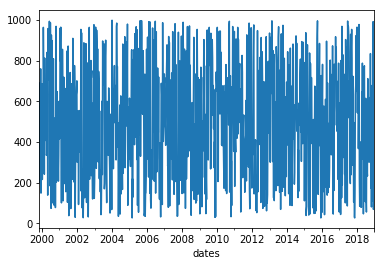

In [0]:
df['data'].plot()

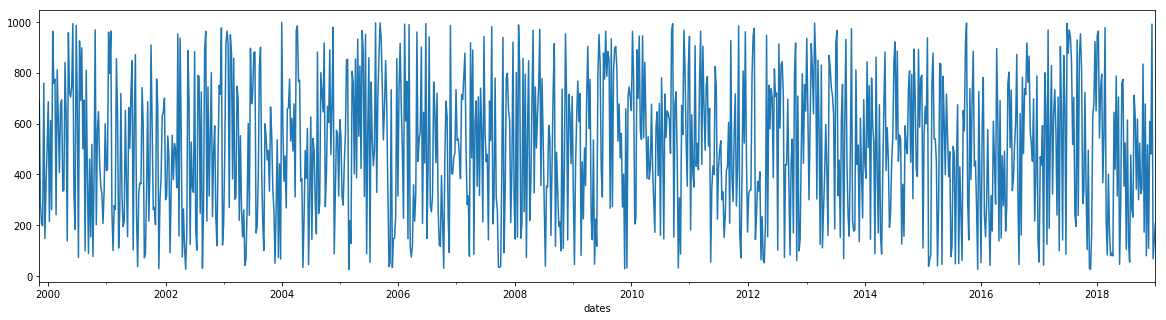

In [0]:
df['data'].plot(figsize=(20, 5))
plt.show()

In [0]:
df[(df.states == 'FL') & (df.status == 1) & (df.index == '2000-03-06')]

,data,status,states
dates,,,


In [0]:
dt = df.groupby(['states', 'status']).apply(lambda x: pd.Series({
    'min': x['data'].min(),
    'max': x.data.max(),
    'sum': x.data.sum(),
    'mean': x.data.mean(),
    'count': x.data.count(),
    'earliest': x.index.min()
}))
pd.DataFrame(dt)

min  max    sum        mean  count   earliest
states status                                               
FL     1        26  998  49965  475.857143    105 1999-11-15
       2        37  996  55955  490.833333    114 1999-11-29
       3        26  993  57057  483.533898    118 1999-11-22
GA     1        31  977  28243  504.339286     56 2000-01-31
       2        26  993  32251  511.920635     63 2000-05-29
       3        67  996  26175  534.183673     49 1999-12-06
NY     1        29  995  53124  515.766990    103 2000-04-03
       2        27  981  57003  504.451327    113 2000-01-17
       3        34  986  62814  479.496183    131 1999-11-08
TX     1        31  979  27627  541.705882     51 2000-08-14
       2       100  995  25805  560.978261     46 1999-12-20
       3        46  948  25673  503.392157     51 2001-01-22

In [0]:
dt = df.groupby(['states', 'status', 'dates']).sum()
dt


data
states status dates           
FL     1      1999-11-15   285
              1999-12-27   510
              2000-01-24   261
              2000-02-07   758
              2000-02-14   774
              2000-03-27   693
              2000-04-24   632
              2000-06-19   184
              2000-09-04   390
              2000-10-23   968
              2001-01-01   415
              2001-01-15   959
              2001-04-09   316
              2001-09-24   216
              2001-10-08   909
              2001-10-22   261
              2001-10-29   270
              2001-11-05   202
              2002-02-25   380
              2002-03-04   521
              2002-06-03   692
              2002-09-02   267
              2002-11-04   488
              2002-12-02   482
              2003-07-28   169
              2003-09-08   210
              2003-11-10   345
              2004-01-05   998
              2004-01-12   592
              2004-04-26   770
...                        ...
TX     3      2009-01-12    46
              2009-01-19   426
              2009-02-23    81
              2009-09-28   903
              2010-04-05   603
              2010-07-05   160
              2010-11-01   307
              2011-03-07   766
              2011-03-28   904
              2011-05-09   660
              2011-07-18   532
              2012-06-11   387
              2013-04-29   403
              2013-06-24   639
              2014-03-31   170
              2014-05-26   584
              2014-06-23   453
              2014-07-28   885
              2014-10-27   793
              2014-12-15   586
              2015-02-02   937
              2016-12-26   134
              2017-03-27   323
              2017-07-03   876
              2017-07-24   840
              2018-01-01   948
              2018-04-09    79
              2018-07-09   614
              2018-09-03   342
              2018-11-12   516

[1000 rows x 1 columns]

In [0]:
dt.index

MultiIndex(levels=[['FL', 'GA', 'NY', 'TX'], [1, 2, 3], [1999-11-08 00:00:00, 1999-11-15 00:00:00, 1999-11-22 00:00:00, 1999-11-29 00:00:00, 1999-12-06 00:00:00, 1999-12-13 00:00:00, 1999-12-20 00:00:00, 1999-12-27 00:00:00, 2000-01-03 00:00:00, 2000-01-10 00:00:00, 2000-01-17 00:00:00, 2000-01-24 00:00:00, 2000-01-31 00:00:00, 2000-02-07 00:00:00, 2000-02-14 00:00:00, 2000-02-21 00:00:00, 2000-02-28 00:00:00, 2000-03-06 00:00:00, 2000-03-13 00:00:00, 2000-03-20 00:00:00, 2000-03-27 00:00:00, 2000-04-03 00:00:00, 2000-04-10 00:00:00, 2000-04-17 00:00:00, 2000-04-24 00:00:00, 2000-05-01 00:00:00, 2000-05-08 00:00:00, 2000-05-15 00:00:00, 2000-05-22 00:00:00, 2000-05-29 00:00:00, 2000-06-05 00:00:00, 2000-06-12 00:00:00, 2000-06-19 00:00:00, 2000-06-26 00:00:00, 2000-07-03 00:00:00, 2000-07-10 00:00:00, 2000-07-17 00:00:00, 2000-07-24 00:00:00, 2000-07-31 00:00:00, 2000-08-07 00:00:00, 2000-08-14 00:00:00, 2000-08-21 00:00:00, 2000-08-28 00:00:00, 2000-09-04 00:00:00, 2000-09-11 00:00:00

In [0]:
dt.index.levels[0]

Index(['FL', 'GA', 'NY', 'TX'], dtype='object', name='states')

In [0]:
dt.loc['FL',1]

,data
dates,
1999-11-15,285
1999-12-27,510
2000-01-24,261
2000-02-07,758
2000-02-14,774
2000-03-27,693
2000-04-24,632
2000-06-19,184
2000-09-04,390


FL 1
FL 2
FL 3
GA 1
GA 2
GA 3
NY 1
NY 2
NY 3
TX 1
TX 2
TX 3


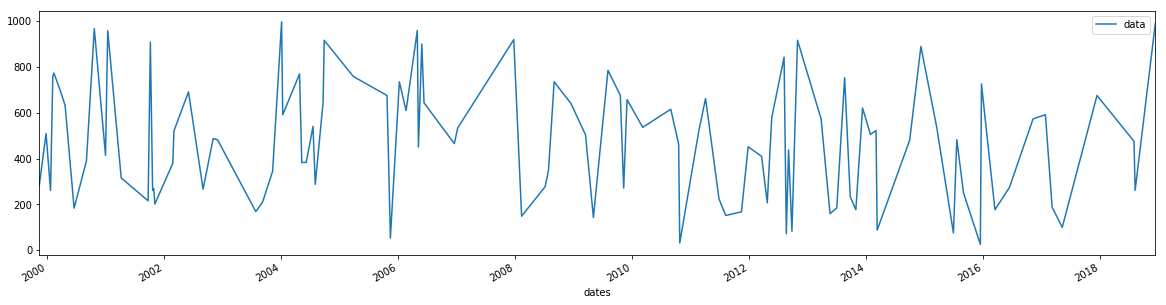

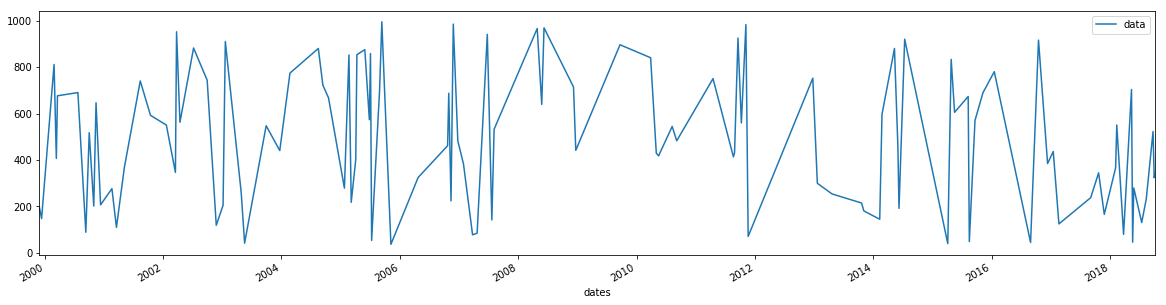

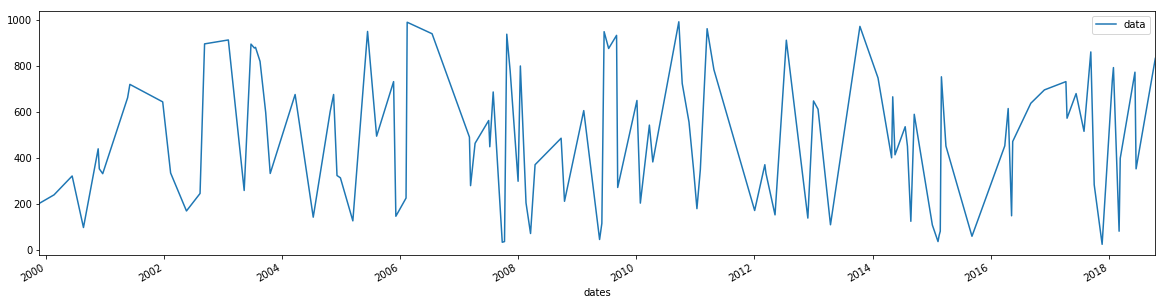

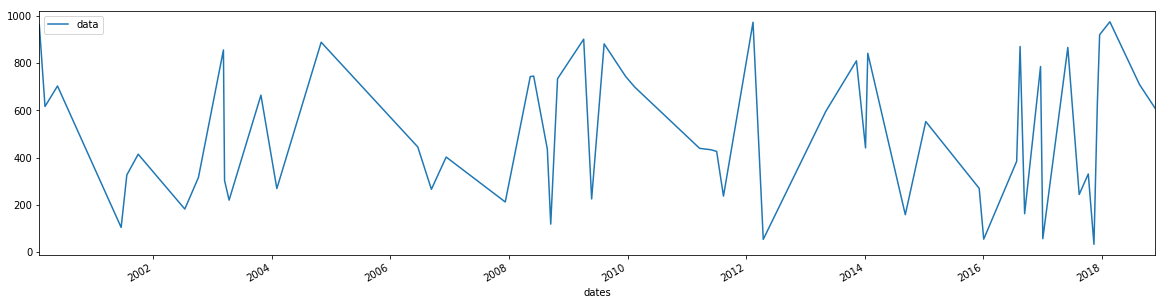

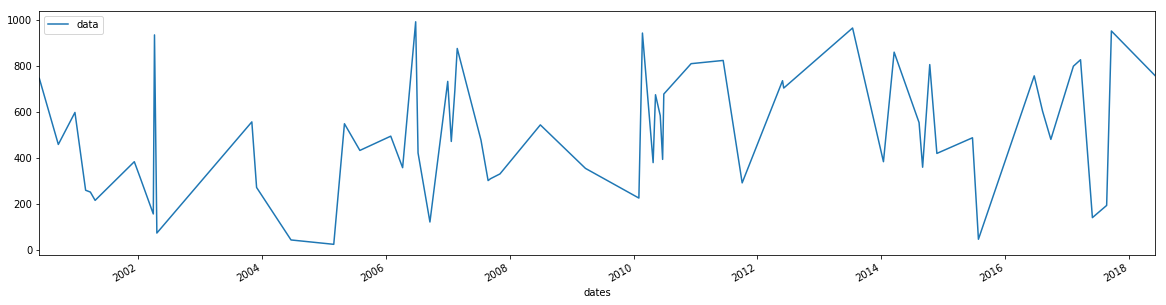

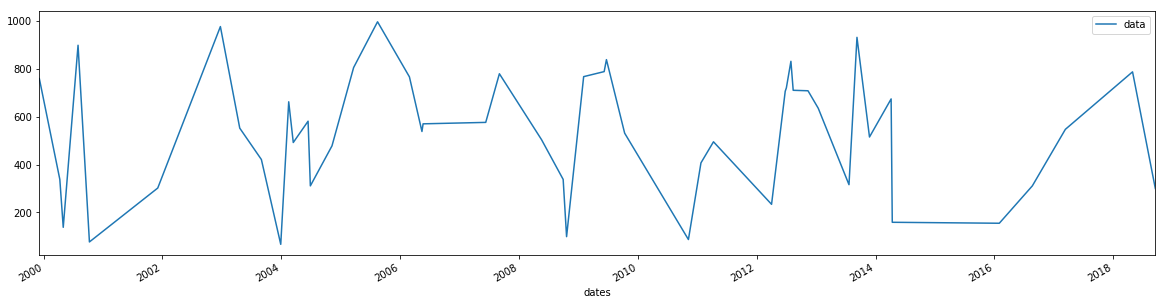

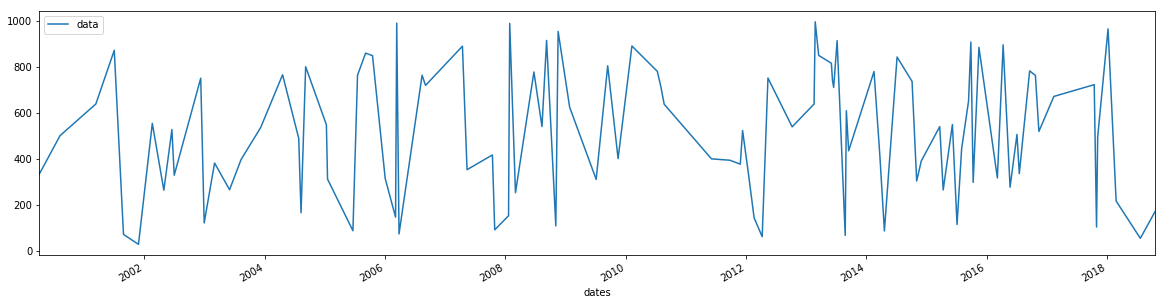

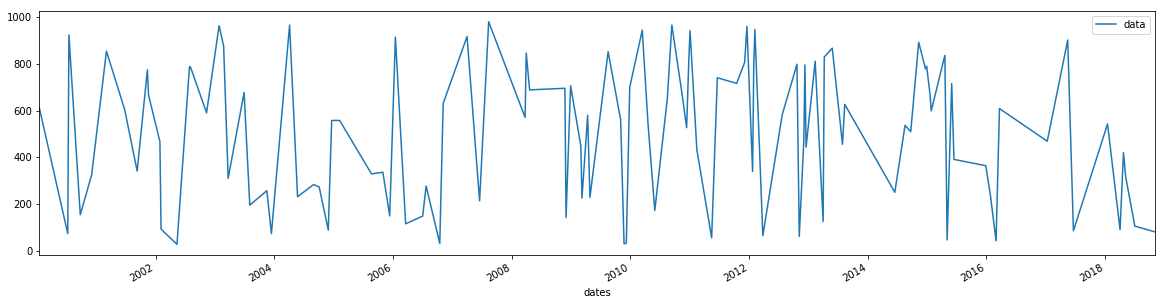

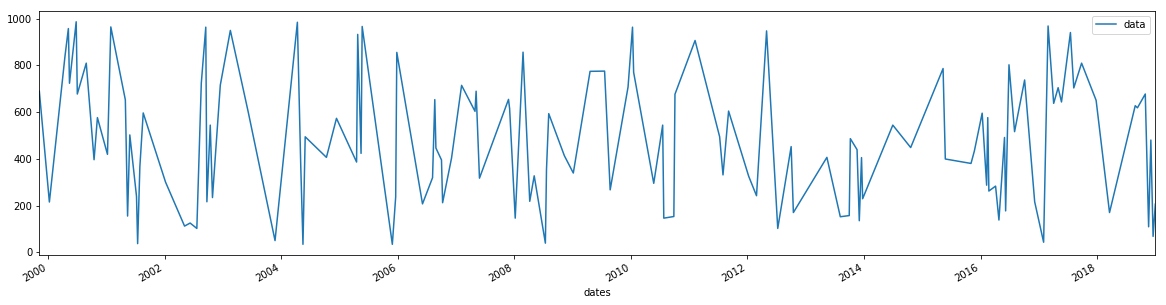

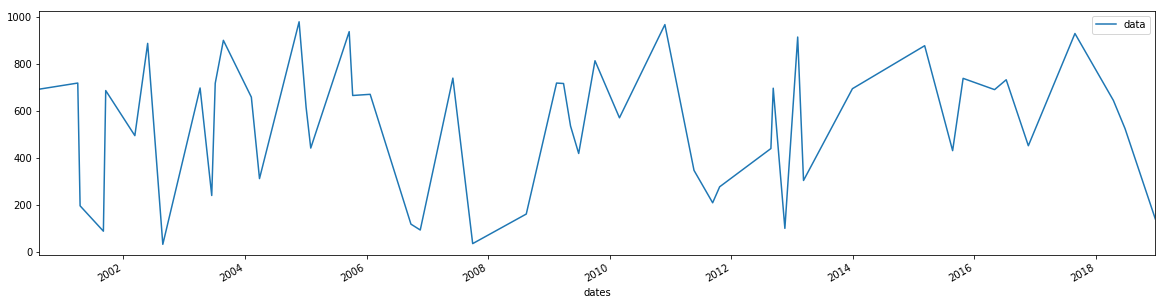

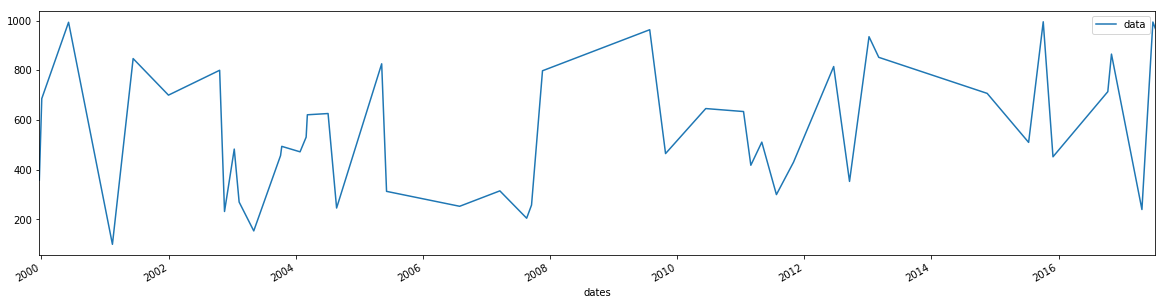

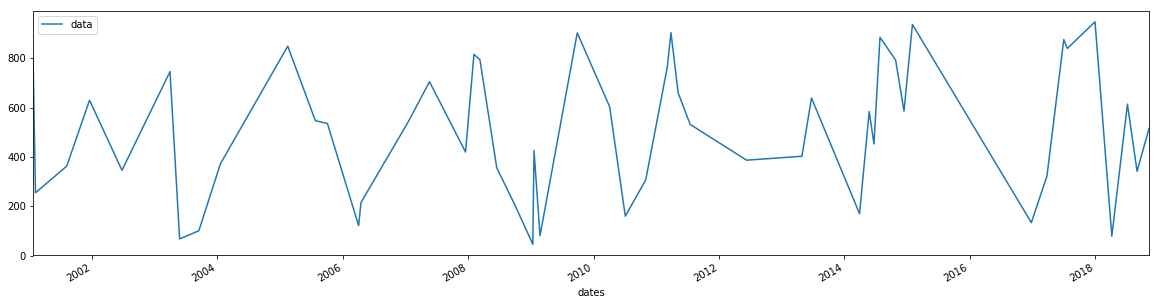

In [0]:
for state in dt.index.levels[0]:
  for status in dt.index.levels[1]:
    dt.loc[state, status].plot(figsize=(20, 5))
    print(state, status)
plt.show()

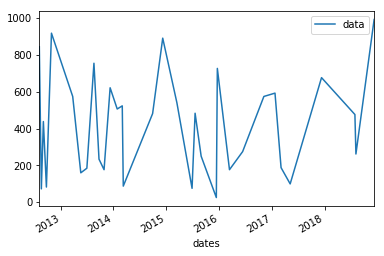

In [0]:
dt.loc['FL', 1]['2012-06':].plot()

In [0]:
sym = dt.groupby([dt.index.levels[0], dt.index.levels[2].year, dt.index.levels[2].month])
dt['Lower'] = sym['data'].transform( lambda x: x.quantile(q=.25) - (1.5*x.quantile(q=.75)-x.quantile(q=.25)) )
dt['Upper'] = sym['data'].transform( lambda x: x.quantile(q=.75) + (1.5*x.quantile(q=.75)-x.quantile(q=.25)) )
dt['Outlier'] = (dt['data'] < dt['Lower']) | (dt['data'] > dt['Upper']) 

dt = dt[dt['Outlier'] == False]

ValueError: ignored

In [0]:
sym = dt.groupby([dt.index.get_level_values(0), dt.index.get_level_values(2).year, dt.index.get_level_values(2).month])
dt['Lower'] = sym['data'].transform( lambda x: x.quantile(q=.25) - (1.5*x.quantile(q=.75)-x.quantile(q=.25)) )
dt['Upper'] = sym['data'].transform( lambda x: x.quantile(q=.75) + (1.5*x.quantile(q=.75)-x.quantile(q=.25)) )
dt['Outlier'] = (dt['data'] < dt['Lower']) | (dt['data'] > dt['Upper']) 

dt = dt[dt['Outlier'] == False]

In [0]:
sym.sum()

In [0]:
dt

In [0]:
ALL = pd.DataFrame(dt['data'].groupby(dt.index.get_level_values(2)).sum())
ALL.columns = ['data'] # rename column
ALL.head()

In [0]:
YearMonth = ALL.groupby([lambda x: x.year, lambda x: x.month])

ALL['Max'] = YearMonth['data'].transform(lambda x: x.max())
ALL.head()

# Introduction to Statistics

In [0]:
# Datasets
# --------
# https://raw.githubusercontent.com/amitkaps/weed/master/data/Demographics_State.csv
# https://raw.githubusercontent.com/amitkaps/weed/master/data/Population_State.csv
# https://raw.githubusercontent.com/amitkaps/weed/master/data/State_Location.csv
# https://github.com/amitkaps/weed/tree/master/data

## Basic Probability

Probability is a simple division of counts. Count of desirable outcome and total count of all outcomes.

$P(H|HHHTTHH)$

$P_P$ - Probability of Population and $P_S$ - Probability of Sample

$P_S \rightarrow P_P$ as my $S \rightarrow P$

For continuous variables, we can never know the probability of an exact event or measurement. We can only know this for a range of values. This range can denote the notion of 'tolerance'. the smaller the range, the more the data needed but the better the results. The larger the range, the lesser the data needed and less reliable are the rsults.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Mean, Median, Mode (Measure of Location)

***Median*** is a value that divides the data into 2 equally sized groups. 2nd Quartile. 50 percentile.

Half the time I am too large and half the times I am too small.

For continuous, median is resistant to errors due to outliers.

For categorical / discrete data, median is resistant to default values.

***Mode*** is a value that is the most probable value. The histogram is tallest over here and number of occurances is the maximum.

The chances of me being right are maximum.

For categorical / discrete, mode is giving the most probable value. So it's suseptible to default value.

***Mean*** is the average value of the data. Sum up all the data and divide by number of data points.

My difference between the actual and what I have said if going to be small.

For continuous, mean is suseptible to outlier.

In [0]:
X = np.random.randint(18, 60, 1000000)
fig, ax = plt.subplots(1, figsize=(15, 5))
sns.distplot(X, bins=100, ax=ax)
# plt.hist(X)
print(X)
plt.show()

## Uniform Distribution - All values are equal and have equal probability

$$\frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x - \mu)^2}{2 \sigma^2}}$$

$$E = m

In [0]:
X = np.random.normal(150, 6, 1000000)  # Mu will be mean, median and mode
fig, ax = plt.subplots(1, figsize=(15, 5))
sns.distplot(X, bins=100, ax=ax)
# plt.hist(X)
print(X)
# plt.xlim([-40, 40])
plt.show()

## Normal distribution - Bell shape curve / distribution - Most common distribution in nature. Most important for a data scientist.
## Central Limit Theorm

# P(x = X) = 

In [0]:
X = np.random.poisson(lam=1000, size=100000)  # lam both mean and mode of the data but not always median
fig, ax = plt.subplots(1, figsize=(15, 5))
sns.distplot(X, bins=100, ax=ax)
# plt.hist(X)
print(X)
plt.show()

print(np.mean(X), np.std(X))

## Poisson Distribution. Normal for whole numbers.

In [0]:
X = np.random.binomial(250, 0.6, size=100000)
fig, ax = plt.subplots(1, figsize=(15, 5))
sns.distplot(X, bins=100, ax=ax)
# plt.hist(X)
print(X)
# plt.xlim([0, 25])
plt.show()

print(np.sqrt(250 * 0.6 * (1-0.6)), 250 * 0.6, np.mean(X), np.std(X))

print(1 - (np.std(X) * np.std(X)) / np.mean(X), np.mean(X) / (1 - (np.std(X) * np.std(X)) / np.mean(X)))

## Binomial Distribution. 10 coins <- n or number of attempts.
## Chances of Heads is 70% = 0.7 <- p or probability of success.
## How many times will I be successfull?

In [0]:
X = list(np.random.binomial(10, 0.7, size=1000000)) + list(np.random.binomial(10, 0.3, size=1000000))
fig, ax = plt.subplots(1, figsize=(15, 5))
sns.distplot(X, bins=100, ax=ax)
# plt.hist(X)
print(X)
plt.show()

In [0]:
X = list(np.random.binomial(10, 0.7, size=1000000)) + list(np.random.binomial(10, 0.22, size=1000000))
fig, ax = plt.subplots(1, figsize=(15, 5))
sns.distplot(X, bins=100, ax=ax)
# plt.hist(X)
print(X)
plt.show()

## Standard Deviation, Inter Quartile Range (Measure of Dispersion)

### Inter Quartile Range

1. Sort the data
2. Find a value that divides the data such that 25% of the data (or a quarter of the data) is below that value and 75% of the data is above (larger).
3. Find another value, this time dividing such that 75% of the data is below and 25% of the data is above.

0% - Minimum

25% - 1st Quartile (1 quarter below)

50% - 2nd Quartile or Median (2 quartes of data below)

75% - 3rd quartile (3 quarters of the data is below)

100% - Maximum

$IQR = Q_3 - Q_1$ Third Quartile minus First Quartile is your inter-quartile range.

$3 * IQR$ -> From your median + or - 1.5 * IQR is accepted region. Anything outside this region is outlier.

in data from 0 to 10 -> Uniform distribution

$Q_1 = 2.5$

$Q_2 = 5$

$Q_3 = 7.5$

$IQR = 7.5 - 2.5 = 5$

$Q_2 - 1.5 * IQR = 5 - 1.5* 5 = -2.5$

$Q_2 + 1.5 * IQR = 5 + 1.5 * 5 = 12.5$

In [0]:
sns.boxplot(list(np.log(np.random.randn(100000))) + [-10, 10])